# Check if the complaints were closed before Due date!
# Success rate = How many very solved by the agency before time out of total number of complaints!

# Calculate the offset between due date and closed date with respect to agency! To get the most efficiently working agency


In [24]:
import pandas as pd
import numpy as np
import datetime as dt
import calendar

dataframe = pd.read_csv('F:/Python_Project/1000linesfile.csv', low_memory = False)
#df.to_csv(filename ,  index = False)

dataframe2 = dataframe.drop(['School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Location','Latitude','Longitude'],axis=1)

dataframe2['Created Date'] = pd.to_datetime(dataframe2['Created Date'])
dataframe2['Closed Date'] = pd.to_datetime(dataframe2['Closed Date'])
dataframe2['Due Date'] = pd.to_datetime(dataframe2['Due Date'])

dataframe2['Time Left'] = (dataframe2['Due Date'] - dataframe2['Closed Date']).dt.days
dataframe2['Month'] = pd.to_datetime(dataframe2['Created Date']).dt.month.apply(lambda x: calendar.month_abbr[x])
dataframe2['weekday'] = dataframe2['Created Date'].dt.dayofweek

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

dataframe2['day_of_week'] = dataframe2['weekday'].apply(lambda x: days[x])

dataframe3 = dataframe2[dataframe2['Agency'].notnull()  & dataframe2['Closed Date'].notnull() & dataframe2['Due Date'].notnull()]


dataframe3['Time'] = dataframe3['Closed Date'] - dataframe3['Created Date']

dataframe3 = dataframe3[['Agency','Complaint Type', 'Time Left']].groupby(['Agency','Complaint Type']).mean().reset_index()
dataframe3 = dataframe3.sort_values(by='Time Left', ascending=0)


dataframe4 = dataframe2[dataframe2['Agency'].notnull()  & dataframe2['Closed Date'].notnull() & dataframe2['Due Date'].notnull()]
dataframe4 = dataframe4[['Agency','Complaint Type', 'Time Left']].groupby(['Agency','Complaint Type'])['Complaint Type'].count().reset_index(name="count")


C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Agency,Complaint Type,count
0,DCA,Consumer Complaint,32
1,DCA,DCA / DOH New License Application Request,1
2,DOB,Construction,15
3,DOE,School Maintenance,2
4,DOF,DOF Literature Request,2
5,DOF,SCRIE,4
6,DOHMH,Food Establishment,14
7,DOHMH,Food Poisoning,2
8,DOHMH,Indoor Air Quality,5
9,DOHMH,Indoor Sewage,3


In [30]:


dataframe_new = pd.merge(dataframe3, dataframe4, on='Complaint Type')
dataframe_new = dataframe_new.T.drop_duplicates().T.sort_values(by='Time Left', ascending=0)
dataframe_new.columns = ['Agency','Complaint Type', 'Efficiency in %', 'count']
dataframe_new
dataframe_new.to_csv("F:/Python_Project/Analysis4/CSV/efficiency of agency.csv" ,  index = False)


,Agency,Complaint Type,Efficiency in %,count
0,DOT,Highway Condition,96,2
1,DOT,Street Sign - Missing,77.6667,3
2,DOT,Street Sign - Damaged,42.25,4
3,DOT,Curb Condition,29,1
4,DOHMH,Rodent,26,2
5,DOHMH,Standing Water,21,2
6,DOT,Broken Parking Meter,17,1
7,DOHMH,Indoor Air Quality,16.2,5
8,DOT,Broken Muni Meter,15.0526,19
9,DPR,DPR Internal,13,1


In [33]:
df_good = dataframe_new[dataframe_new['Efficiency in %'] >= 0]
df_bad = dataframe_new[dataframe_new['Efficiency in %'] < 0]

df_good.to_csv("F:/Python_Project/Analysis4/CSV/efficiency of agency_GOOD.csv" ,  index = False)
df_bad.to_csv("F:/Python_Project/Analysis4/CSV/efficiency of agency_BAD.csv" ,  index = False)




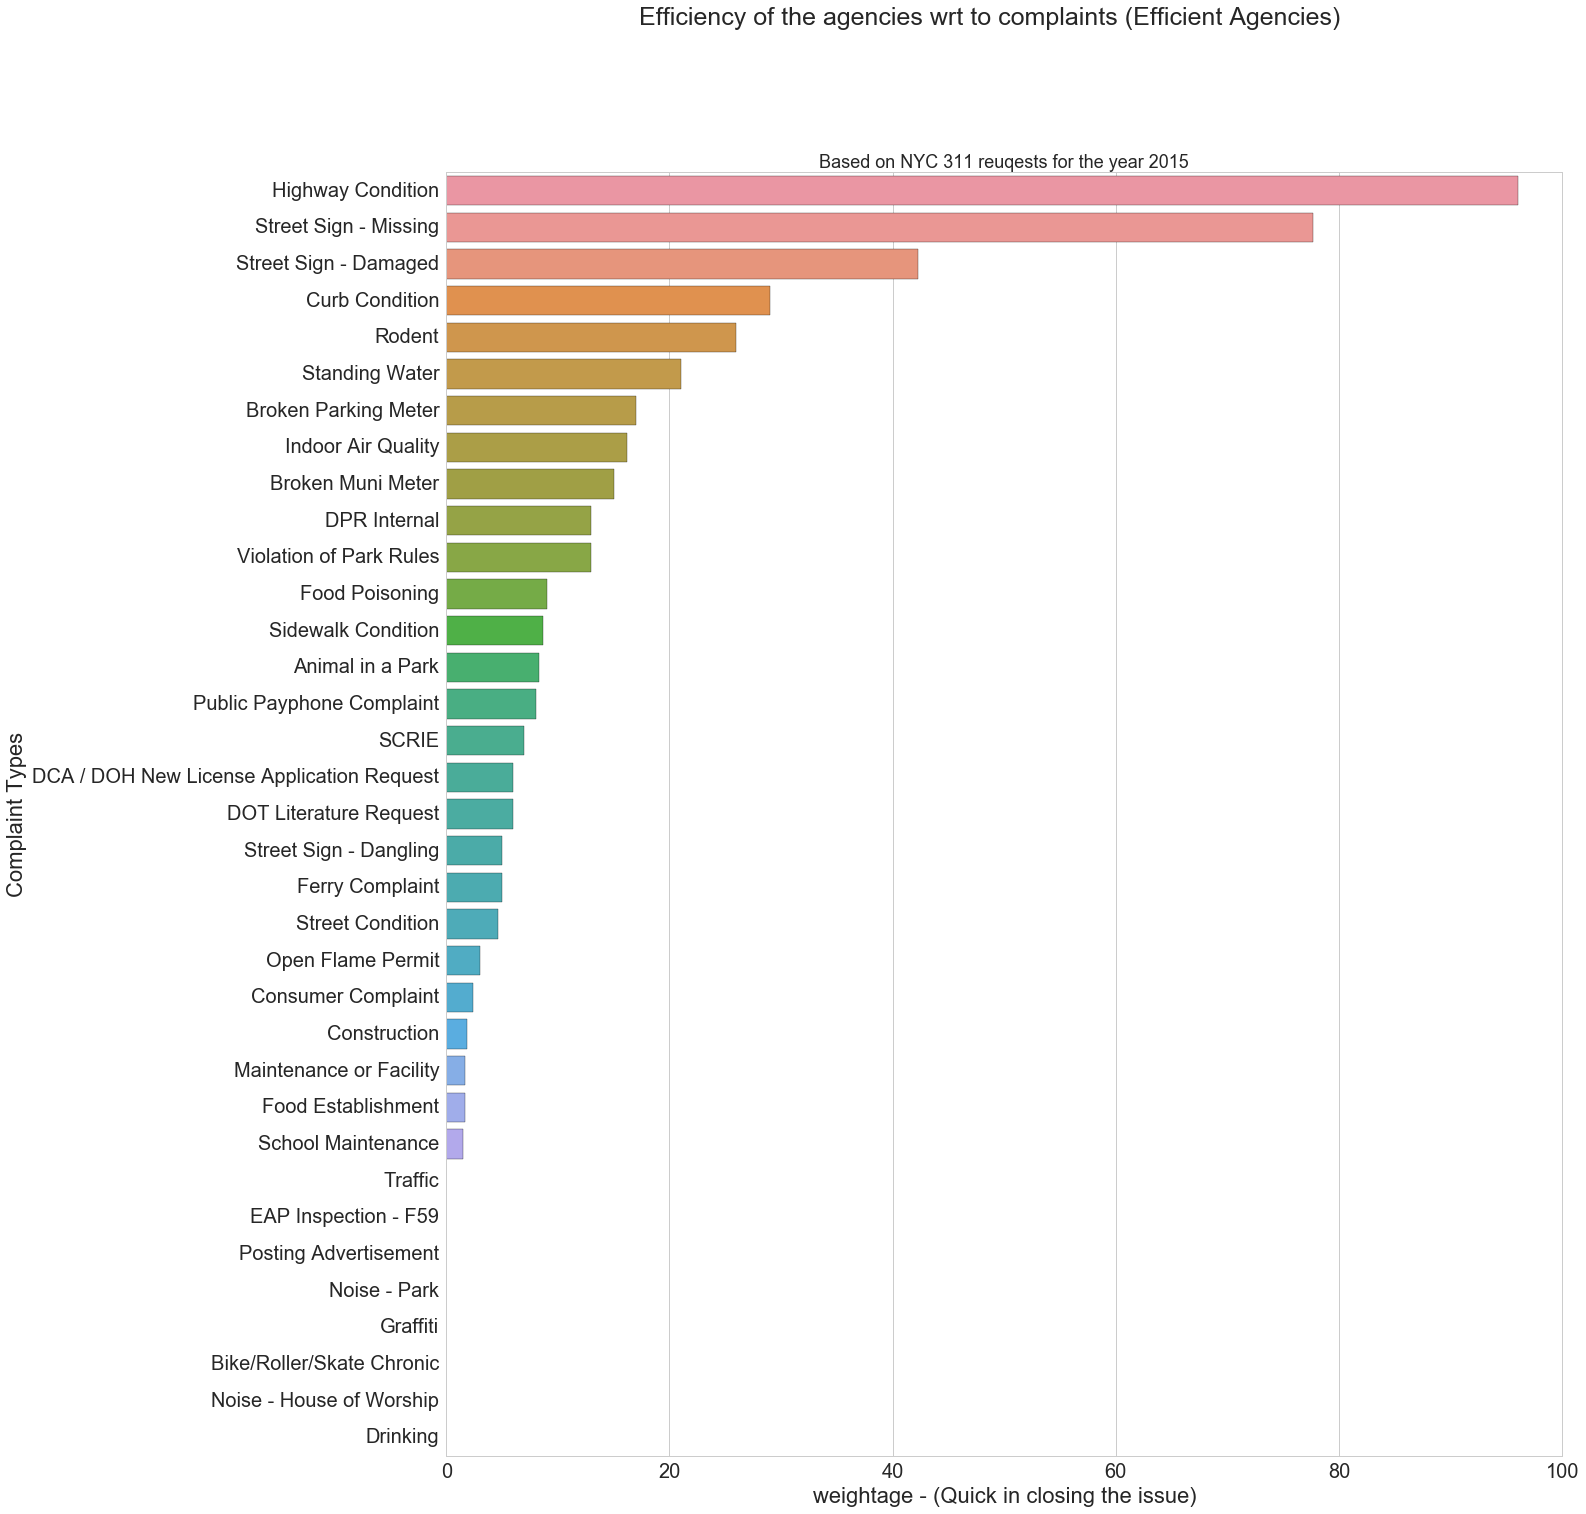

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,23))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Efficiency in %", y="Complaint Type", data=df_good)
plt.xlabel("weightage - (Quick in closing the issue)")
plt.ylabel("Complaint Types")
plt.suptitle(" Efficiency of the agencies wrt to complaints (Efficient Agencies)", y=1, fontsize=25)
plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
plt.savefig("F:/Python_Project/Analysis4/Images/efficient_agencies.png", bbox_inches='tight')

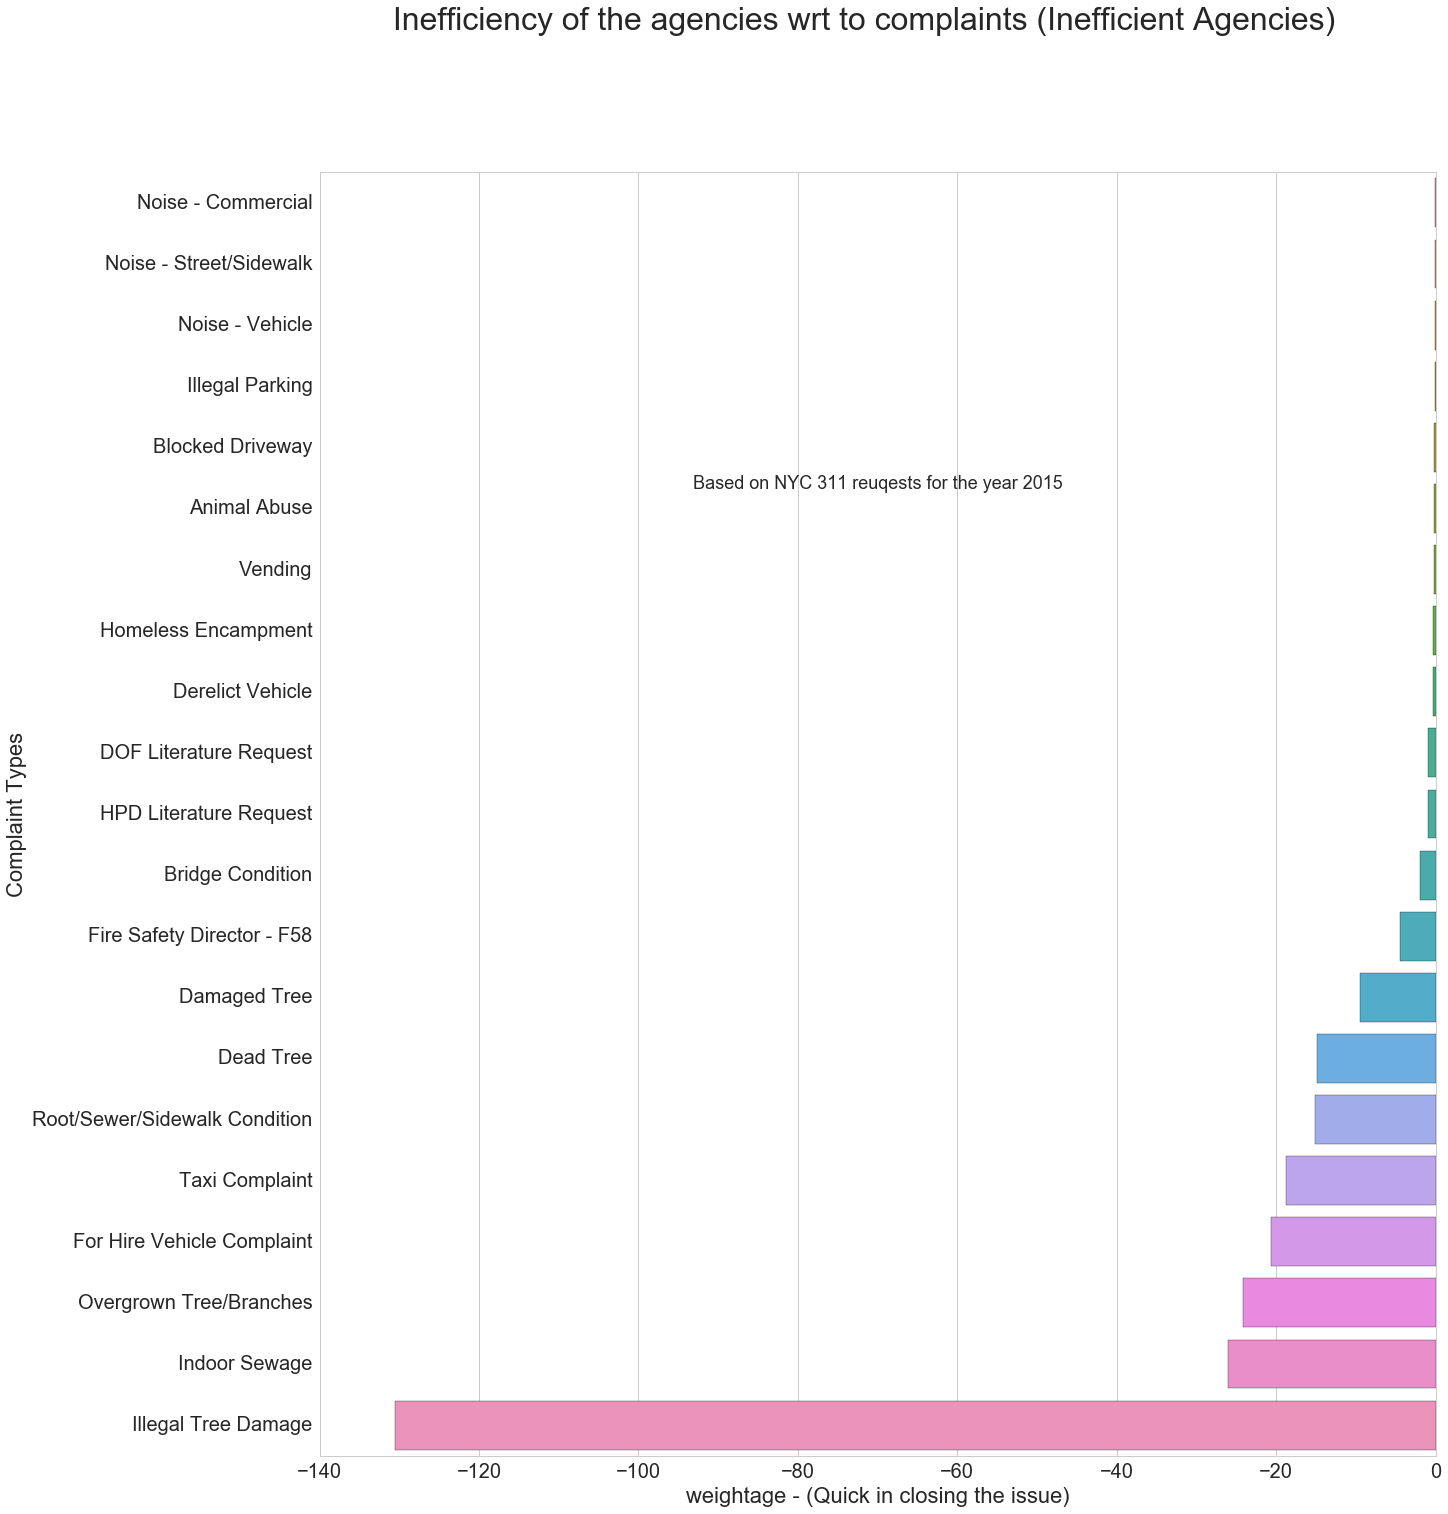

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,23))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Efficiency in %", y="Complaint Type", data=df_bad)
plt.xlabel("weightage - (Quick in closing the issue)")
plt.ylabel("Complaint Types")
plt.suptitle(" Inefficiency of the agencies wrt to complaints (Inefficient Agencies)", y=1, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year 2015",y=0.75, fontsize=18)
plt.savefig("F:/Python_Project/Analysis4/Images/inefficient_agencies.png", bbox_inches='tight')